In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Data overview with the help of pandas head() function

In [2]:
df_pa = pd.read_csv("previous_application.csv")
df_pa.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## Data det info with help of pandas .info() function

In [3]:
df_pa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

#### previuos application data have total 1670214 rows and 37 columns.
#### In between 37 columns, 15 columns have float type values, 6 columns have int type and rest 16 have object type value.

## Data Cleaning 
### Detect the null values of the columns 

In [4]:
total_null_values = df_pa.isnull().sum().sort_values(ascending = True)
total_value_percentage = 100*(df_pa.isnull().sum()/df_pa.isnull().count()).sort_values(ascending = True)
missing_values = pd.concat([total_null_values,total_value_percentage], axis = 1, keys = ['total','percentage'])
missing_values

,total,percentage
SK_ID_PREV,0,0.000000
NAME_YIELD_GROUP,0,0.000000
NAME_SELLER_INDUSTRY,0,0.000000
SELLERPLACE_AREA,0,0.000000
CHANNEL_TYPE,0,0.000000
NAME_PRODUCT_TYPE,0,0.000000
NAME_PORTFOLIO,0,0.000000
NAME_GOODS_CATEGORY,0,0.000000
NAME_CLIENT_TYPE,0,0.000000
CODE_REJECT_REASON,0,0.000000


#### Here more than 10 rows holds more than 40% of null values

### Drop those columns that holds null values.

In [5]:
df_pa.drop(['RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIMARY','RATE_DOWN_PAYMENT','AMT_DOWN_PAYMENT','NAME_TYPE_SUITE','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE'], axis = 1 , inplace = True)
df_pa.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


#### After droping 26 colums are remain.

In [6]:
df_pa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

## Anlysis of data

In [7]:
df_pa.AMT_ANNUITY.describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

### The Standard Deviation stays at approx 1500000 and the max amount is 4000000+

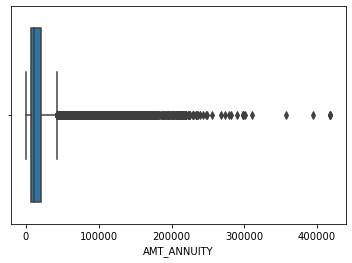

In [9]:
sns.boxplot(df_pa.AMT_ANNUITY)
plt.show()

#### AMT_ANNUITY column has a huge number of outliers and few of them has a huge difference in value.


In [10]:
df_pa.AMT_APPLICATION.describe()

count    1.670214e+06
mean     1.752339e+05
std      2.927798e+05
min      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.803600e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64

### The Standard Deviation stays at approx 3000000 and the max amount is 7000000+

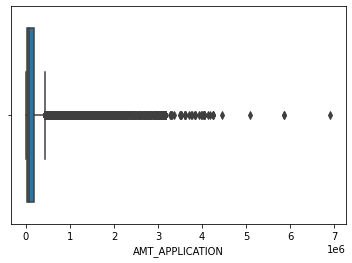

In [11]:
sns.boxplot(df_pa.AMT_APPLICATION)
plt.show()

#### #### AMT_APPLICATION column has a huge number of outliers and few of them has a huge difference in value.

In [12]:
df_pa.AMT_CREDIT.describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

### The Standard Deviation stays at 3000000+ and the max amount is approx 7000000

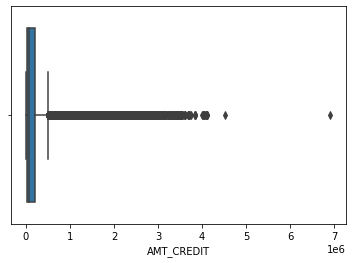

In [13]:
sns.boxplot(df_pa.AMT_CREDIT)
plt.show()

#### AMT_CREDIT column has a huge number of outliers and only two of them has a huge difference in value.

In [14]:
df_pa.AMT_GOODS_PRICE.describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

### The Standard Deviation stays at 3000000+ and the max amount is approx 7000000

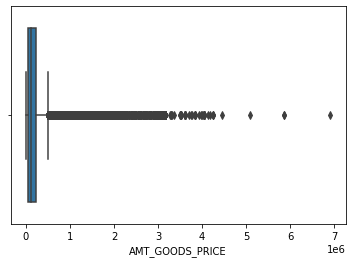

In [15]:
sns.boxplot(df_pa.AMT_GOODS_PRICE)
plt.show()

#### AMT_GOODS_PRICE column has a huge number of outliers and only four of them has a huge difference in value.

### Relation between colums

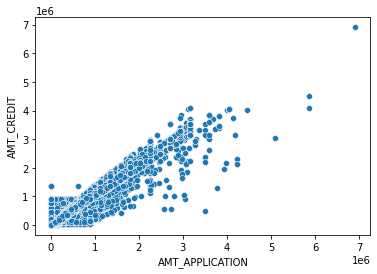

In [16]:
sns.scatterplot(data = df_pa, x = 'AMT_APPLICATION',y = 'AMT_CREDIT')
plt.show()

#### AMT_APPLICATION and AMT_CREDIT columns are positively Co-related with each other.

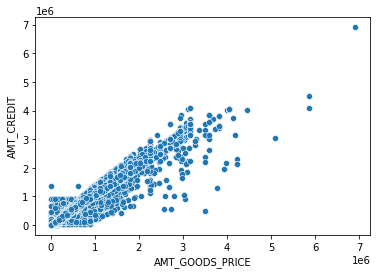

In [17]:
sns.scatterplot(data = df_pa, x = 'AMT_GOODS_PRICE',y = 'AMT_CREDIT')
plt.show()

#### AMT_GOODS_PRICE and AMT_CREDIT columns are positively Co-related with each other.

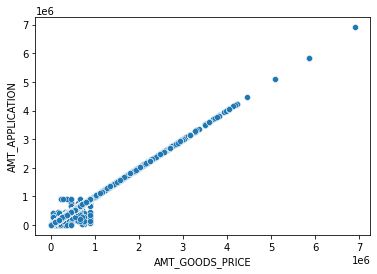

In [18]:
sns.scatterplot(data = df_pa, x = 'AMT_GOODS_PRICE',y = 'AMT_APPLICATION')
plt.show()

#### AMT_GOODS_PRICE and AMT_APPLICATION columns are Highly-positively Co-related with each other.

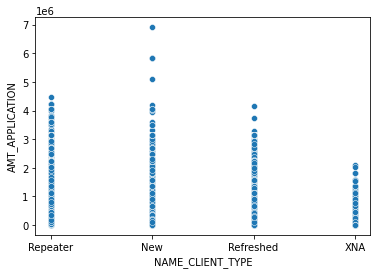

In [19]:
sns.scatterplot(data = df_pa, x = 'NAME_CLIENT_TYPE',y = 'AMT_APPLICATION')
plt.show()

#### Most of clients are new who has highest amount of loan applications.
#### Reapeater and Refreshed clients has approx same amount of loan applications.

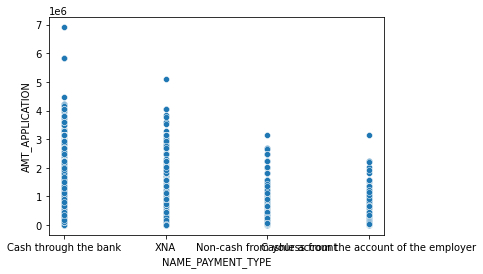

In [20]:
sns.scatterplot(data = df_pa, x = 'NAME_PAYMENT_TYPE',y = 'AMT_APPLICATION')
plt.show()

#### Cash through the bank is the most used type for loan amount credit 

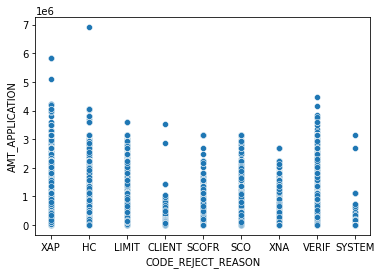

In [21]:
sns.scatterplot(data = df_pa, x = 'CODE_REJECT_REASON',y = 'AMT_APPLICATION')
plt.show()

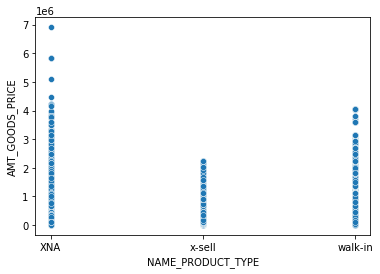

In [22]:
sns.scatterplot(data = df_pa, x = 'NAME_PRODUCT_TYPE',y = 'AMT_GOODS_PRICE')
plt.show()

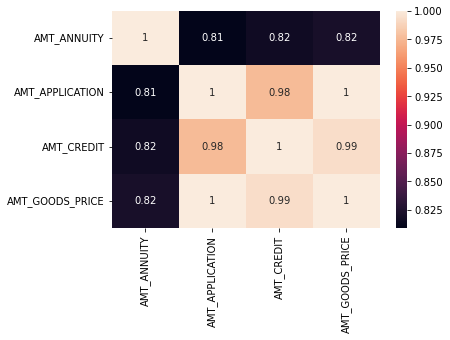

In [25]:
sns.heatmap(df_pa[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE']].corr(),annot = True)
plt.show()

### AMT_APPLICATION,AMT_CREDIT and AMT_GOODS_PRICE are highly co-related with each other.